# การสร้างแบบจำลอง เพื่อคัดแยกการได้สิทธิ์บัตรสวัสดิการแห่งรัฐ

## การสำรวจข้อมูลเบื้องต้น

In [271]:
import pandas as pd

sample_num = 10000
df_positive = pd.read_excel('/content/drive/My Drive/data/mof/welfare/cleaned_fpo_welfare_positive.xlsx')
df_positive = df_positive.sample(n=sample_num, random_state=2020)
df_positive

,Gender,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,District_Type,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Abode_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Doc_Type,Happiness,Income,Label
36082,ญ,84,อาชีพอื่นๆ,"ต่ำกว่าชั้นประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,50,5004,5,0,0,0,1,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,16666,1
31787,ช,57,เกษตร-ทำไร่,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,42,4211,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",5,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,25000,1
33964,ช,53,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,45,4505,5,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,3,0,0,ไม่ระบุ,8,50000,1
26097,ญ,48,รับจ้างทั่วไป,ม.ต้น (มศ.1-3 หรือ ม.1-3),0,0,0,0,61,6106,6,0,0,0,0,สิทธิในการทำเกษตรกรรม (ส.ป.ก.4-ไม่ระบุ1),0,0,0,0,สิทธิในการทำเกษตรกรรม (ส.ป.ก.4-ไม่ระบุ1),9,40000,1
41101,ช,65,รับจ้างทั่วไป,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,70,7001,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",2,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,80000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,ช,63,รับจ้างทั่วไป,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,31,3103,6,0,0,0,0,ไม่ระบุ,0,0,0,0,ไม่ระบุ,7,27000,1
83477,ญ,71,รับจ้างทั่วไป,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,54,5403,5,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,8,33333,1
48721,ช,53,ไม่มีอาชีพ,ไม่เคยศึกษา,0,0,0,0,30,3002,5,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,8,54000,1
10163,ญ,69,ไม่มีอาชีพ,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,47,4702,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,9,0,0,ไม่ระบุ,8,33333,1


In [272]:
df_negative = pd.read_excel('/content/drive/My Drive/data/mof/welfare/cleaned_fpo_welfare_negative.xlsx')
df_negative = df_negative.sample(n=sample_num, random_state=2020)
df_negative

,Gender,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,District_Type,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Abode_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Doc_Type,Happiness,Income,Label
4738,ญ,51,ไม่มีอาชีพ,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,19,1907,5,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,8,300000,0
9876,ช,52,พนักงานบริษัท,อนุปริญญา หรือเทียบเท่า หรือ ปวส.,0,0,0,0,44,4401,4,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,7,200000,0
14629,ช,53,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,44,4412,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",18,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",10,175000,0
10502,ช,57,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,34,3410,6,0,0,0,0,"หนังสือรับรองการทำประโยชน์ (น.ส.3, น.ส.3 ก หรื...",25,0,0,23,"หนังสือรับรองการทำประโยชน์ (น.ส.3, น.ส.3 ก หรื...",9,200000,0
26357,ช,55,รับจ้างทั่วไป,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,71,7101,6,1,0,0,0,"หนังสือรับรองการทำประโยชน์ (น.ส.3, น.ส.3 ก หรื...",0,0,0,0,ไม่ระบุ,7,106666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,ญ,38,พนักงาน-รับราชการ,ป.ตรี หรือเทียบเท่า,0,0,0,0,71,7106,5,3,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,8,120000,0
23229,ญ,47,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,64,6406,6,0,0,0,0,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,120000,0
11032,ช,40,พนักงานบริษัท,ป.ตรี หรือเทียบเท่า,0,0,0,0,20,2005,6,0,0,0,0,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,200000,0
25135,ญ,51,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,40,4002,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",2,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,110000,0


นำข้อมูล Positive กับ Negative มารวมกันเป็น df

In [273]:
df = df_positive.append(df_negative)
df

,Gender,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,District_Type,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Abode_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Doc_Type,Happiness,Income,Label
36082,ญ,84,อาชีพอื่นๆ,"ต่ำกว่าชั้นประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,50,5004,5,0,0,0,1,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,16666,1
31787,ช,57,เกษตร-ทำไร่,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,42,4211,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",5,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,25000,1
33964,ช,53,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,45,4505,5,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,3,0,0,ไม่ระบุ,8,50000,1
26097,ญ,48,รับจ้างทั่วไป,ม.ต้น (มศ.1-3 หรือ ม.1-3),0,0,0,0,61,6106,6,0,0,0,0,สิทธิในการทำเกษตรกรรม (ส.ป.ก.4-ไม่ระบุ1),0,0,0,0,สิทธิในการทำเกษตรกรรม (ส.ป.ก.4-ไม่ระบุ1),9,40000,1
41101,ช,65,รับจ้างทั่วไป,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,70,7001,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",2,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,80000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,ญ,38,พนักงาน-รับราชการ,ป.ตรี หรือเทียบเท่า,0,0,0,0,71,7106,5,3,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,ไม่ระบุ,8,120000,0
23229,ญ,47,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,64,6406,6,0,0,0,0,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,120000,0
11032,ช,40,พนักงานบริษัท,ป.ตรี หรือเทียบเท่า,0,0,0,0,20,2005,6,0,0,0,0,ไม่ระบุ,0,0,0,0,ไม่ระบุ,8,200000,0
25135,ญ,51,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,40,4002,6,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",2,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",8,110000,0


## แปลงข้อมูลชนิด Category

In [274]:
df['Education'].unique()

array(['ต่ำกว่าชั้นประถมฯ (ป.4, ป.7, ป.6)', 'ประถมฯ (ป.4, ป.7, ป.6)',
       'ม.ต้น (มศ.1-3 หรือ ม.1-3)',
       'ม.ปลาย (มศ.4-5 หรือ ม.4-6 หรือ ปวช.)', 'ไม่เคยศึกษา',
       'ป.ตรี หรือเทียบเท่า', 'อนุปริญญา หรือเทียบเท่า หรือ ปวส.',
       'สูงกว่าปริญญาตรี', 'อนุบาล/ศูนย์เด็กเล็ก'], dtype=object)

In [275]:
eduMapping = {
    'ไม่เคยศึกษา':0,
    'อนุบาล/ศูนย์เด็กเล็ก':1,
    'ต่ำกว่าชั้นประถมฯ (ป.4, ป.7, ป.6)':2, 
    'ประถมฯ (ป.4, ป.7, ป.6)':3,
    'ม.ต้น (มศ.1-3 หรือ ม.1-3)':4,
    'ม.ปลาย (มศ.4-5 หรือ ม.4-6 หรือ ปวช.)':5, 
    'อนุปริญญา หรือเทียบเท่า หรือ ปวส.':6,
    'ป.ตรี หรือเทียบเท่า':7, 
    'สูงกว่าปริญญาตรี':8 
}

In [276]:
df['Occupation'].unique()

array(['อาชีพอื่นๆ', 'เกษตร-ทำไร่', 'เกษตร-ทำนา', 'รับจ้างทั่วไป',
       'ไม่มีอาชีพ', 'เกษตร-ทำสวน', 'ค้าขาย', 'พนักงานบริษัท',
       'ธุรกิจส่วนตัว', 'เกษตร-ประมง', 'เกษตร-ปศุสัตว์', 'กำลังศึกษา',
       'พนักงาน-รัฐวิสาหกิจ', 'พนักงาน-รับราชการ'], dtype=object)

In [277]:
occMapping = {
    'ไม่มีอาชีพ':0, 
    'กำลังศึกษา':1,
    'อาชีพอื่นๆ':2, 
    'เกษตร-ทำนา':3,
    'เกษตร-ทำไร่':4,
    'เกษตร-ทำสวน':5,
    'เกษตร-ปศุสัตว์':6, 
    'เกษตร-ประมง':7,
    'รับจ้างทั่วไป':8,
    'พนักงาน-รับราชการ':9,
    'พนักงาน-รัฐวิสาหกิจ':10, 
    'พนักงานบริษัท':11,
    'ค้าขาย':12, 
    'ธุรกิจส่วนตัว':13, 
}

In [278]:
from sklearn.preprocessing import LabelEncoder

genderEncoder = LabelEncoder()
df['Gender'] = genderEncoder.fit_transform(df['Gender'].values)

df['Occupation'] = df['Occupation'].map(occMapping)
df['Education'] = df['Education'].map(eduMapping)

abodeDocTypeEncoder = LabelEncoder()
df['Abode_Doc_Type'] = abodeDocTypeEncoder.fit_transform(df['Abode_Doc_Type'].values)

occupationDocTypeEncoder = LabelEncoder()
df['Occupation_Doc_Type'] = occupationDocTypeEncoder.fit_transform(df['Occupation_Doc_Type'].values)

df

,Gender,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,District_Type,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Abode_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Doc_Type,Happiness,Income,Label
36082,1,84,2,2,0,0,0,0,50,5004,5,0,0,0,1,11,0,0,0,0,11,8,16666,1
31787,0,57,4,3,0,0,0,0,42,4211,6,0,0,0,0,8,5,0,0,0,8,8,25000,1
33964,0,53,3,3,0,0,0,0,45,4505,5,0,0,0,0,8,0,3,0,0,11,8,50000,1
26097,1,48,8,4,0,0,0,0,61,6106,6,0,0,0,0,1,0,0,0,0,1,9,40000,1
41101,0,65,8,3,0,0,0,0,70,7001,6,0,0,0,0,8,2,0,0,0,8,8,80000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,1,38,9,7,0,0,0,0,71,7106,5,3,0,0,0,8,0,0,0,0,11,8,120000,0
23229,1,47,3,3,0,0,0,0,64,6406,6,0,0,0,0,11,0,0,0,0,11,8,120000,0
11032,0,40,11,7,0,0,0,0,20,2005,6,0,0,0,0,11,0,0,0,0,11,8,200000,0
25135,1,51,3,3,0,0,0,0,40,4002,6,0,0,0,0,8,2,0,0,0,8,8,110000,0


## การตรวจสอบข้อมูลเบื้องต้น

ต่อไปนี้คือการตรวจสอบว่าข้อมูลเป็น Null ที่คอลัมน์ใดบ้าง

In [279]:
df.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Education              0
Elderly                0
Disabled               0
Chronic_Patient        0
Self_Reliance          0
Province_ID            0
Amphur_ID              0
District_Type          0
Abode_Own              0
Abode_Rent             0
Abode_Public           0
Abode_Other            0
Abode_Doc_Type         0
Occupation_Own         0
Occupation_Rent        0
Occupation_Public      0
Occupation_Other       0
Occupation_Doc_Type    0
Happiness              0
Income                 0
Label                  0
dtype: int64

การพิจารณาค่าเฉลี่ยของแต่ละคอลัมน์ แยกโดยใช้คอลัมน์ Label ทำให้สังเกตได้หลายประเด็น เช่น

1. Elderly, Disabled, Chronic_Patient, Self_Reliance มีค่าเฉลี่ยเป็น 0 สามารถตัดออกได้
2. กลุ่มคนไม่ได้สิทธิ์ (Label = 0) เมื่อเทียบกับกลุ่มคนที่ได้สิทธิ์ (Label = 1) มีที่น่าสังเกตดังนี้
- มีอาชีพ (Occupation) ส่วนใหญ่อยู่ในกลุ่ม 8 ขึ้นไป 
- มีระดับการศึกษา (Education) สูงกว่า
- มีรายได้ (Income) สูงกว่า

In [280]:
df.groupby('Label').mean()

,Gender,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,District_Type,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Abode_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Doc_Type,Happiness,Income
Label,,,,,,,,,,,,,,,,,,,,,,,
0,0.4264,49.226,8.1932,5.1088,0.0,0.0,0.0,0.0,43.6993,4375.2678,5.2067,0.813,0.0090,0.0035,0.0175,7.7769,5.3915,1.0059,0.0175,0.1275,9.7457,8.2562,223500.9768
1,0.4320,57.271,4.7150,3.0622,0.0,0.0,0.0,0.0,47.6260,4769.8583,5.6680,0.000,0.0201,0.0054,0.0343,7.1697,5.8978,0.6686,0.0621,0.3682,8.4770,8.1006,43194.8639


Text(0, 0.5, 'Amount')

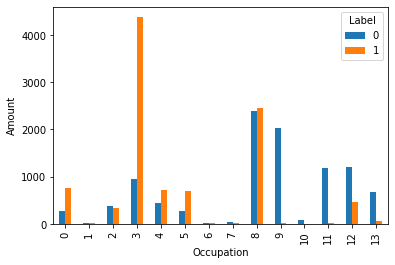

In [312]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Occupation, df.Label).plot(kind='bar')
plt.title('')
plt.xlabel('Occupation')
plt.ylabel('Amount')

### ลบคอลัมน์ที่ไม่ต้องการ

In [281]:
dropped_columns = ['Elderly', 
                   'Disabled', 
                   'Chronic_Patient', 
                   'Self_Reliance', 
                   'Province_ID', 
                   'Amphur_ID', 
                   'District_Type',
                   'Abode_Doc_Type',
                   'Occupation_Doc_Type',
                   'Happiness']
df = df.drop(columns=dropped_columns)
df

,Gender,Age,Occupation,Education,Abode_Own,Abode_Rent,Abode_Public,Abode_Other,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Income,Label
36082,1,84,2,2,0,0,0,1,0,0,0,0,16666,1
31787,0,57,4,3,0,0,0,0,5,0,0,0,25000,1
33964,0,53,3,3,0,0,0,0,0,3,0,0,50000,1
26097,1,48,8,4,0,0,0,0,0,0,0,0,40000,1
41101,0,65,8,3,0,0,0,0,2,0,0,0,80000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,1,38,9,7,3,0,0,0,0,0,0,0,120000,0
23229,1,47,3,3,0,0,0,0,0,0,0,0,120000,0
11032,0,40,11,7,0,0,0,0,0,0,0,0,200000,0
25135,1,51,3,3,0,0,0,0,2,0,0,0,110000,0


In [282]:
df.columns.size

14

## การเทรนแบบจำลองโดยใช้ข้อมูลทั้งหมด

In [283]:
from sklearn.model_selection import train_test_split
import numpy as np

y = df['Label']
X = df.iloc[:,1:(df.columns.size-1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2020)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [10000 10000]
Labels counts in y_train [7507 7493]
Labels counts in y_test [2493 2507]


In [284]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [286]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty='l2', random_state=2020, solver='liblinear', multi_class='ovr')
lr2.fit(X_train_std, y_train)
print('Training Accuracy: ', lr2.score(X_train_std, y_train))
print('Test Accuracy: ', lr2.score(X_test_std, y_test))

Training Accuracy:  0.9937333333333334
Test Accuracy:  0.9958


## Dimensionality Reduction โดยใช้ LDA

In [306]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_train_lda = lda.fit_transform(X_train_std, y_train)

ขนาดของค่าสัมประสิทธิ์ใน LDA ช่วยบอกความสำคัญของแต่ละคอลัมน์

In [307]:
coef = pd.DataFrame(lda.coef_.T, columns=['coef'], index=X.columns)
coef = coef.abs()
coef = coef.sort_values(by=['coef'], ascending=False)
print(coef)

                       coef
Income             1.327220
Education          1.169357
Occupation         0.773120
Abode_Own          0.344852
Age                0.193906
Occupation_Own     0.181918
Occupation_Other   0.040152
Abode_Other        0.021573
Occupation_Rent    0.019355
Abode_Rent         0.017505
Occupation_Public  0.015268
Abode_Public       0.005862


จัดเตรียมข้อมูลเฉพาะคอลัมน์ที่สำคัญเช่น 'Income','Education','Occupation','Abode_Own','Age','Occupation_Own'

In [308]:
X_ai = df[['Income','Education','Occupation','Abode_Own','Age','Occupation_Own']]
X_ai

X_ai_train, X_ai_test, y_train, y_test = train_test_split(X_ai, y, test_size=0.25, random_state=2020)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [10000 10000]
Labels counts in y_train [7507 7493]
Labels counts in y_test [2493 2507]


In [309]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_ai_train)
X_ai_train_std = ss.transform(X_ai_train)
X_ai_test_std = ss.transform(X_ai_test)

In [310]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty='l2', random_state=2020, solver='liblinear', multi_class='ovr')
lr2.fit(X_ai_train_std, y_train)
print('Training Accuracy: ', lr2.score(X_ai_train_std, y_train))
print('Test Accuracy: ', lr2.score(X_ai_test_std, y_test))

Training Accuracy:  0.9936666666666667
Test Accuracy:  0.996
